## Maximum Entropy Model

In [ ]:
import numpy as np

# Example: MEM with two features f1(x) and f2(x)
# Feature functions
def f1(x):
    return np.sum(x)  # Example: Sum of all variables

def f2(x):
    return np.sum(x**2)  # Example: Sum of squared variables

# Energy function
def energy(x, lambdas):
    return lambdas[0] * f1(x) + lambdas[1] * f2(x)

# Partition function (approximate via MCMC)
def partition_function(lambdas, num_samples=1000, dim=10):
    samples = np.random.randint(0, 2, size=(num_samples, dim))  # Random binary states
    energies = np.array([energy(sample, lambdas) for sample in samples])
    return np.sum(np.exp(-energies))

# Probability of a state (approximate)
def probability(x, lambdas, Z):
    return np.exp(-energy(x, lambdas)) / Z

# Gradient of log-likelihood
def gradient(empirical_expectations, lambdas, num_samples=1000, dim=10):
    samples = np.random.randint(0, 2, size=(num_samples, dim))
    Z = partition_function(lambdas, num_samples, dim)
    model_expectations = [np.mean([f1(sample) * probability(sample, lambdas, Z) for sample in samples]),
                          np.mean([f2(sample) * probability(sample, lambdas, Z) for sample in samples])]
    return empirical_expectations - np.array(model_expectations)

# Gradient descent
lambdas = np.random.rand(2)  # Initialize weights
empirical_expectations = np.array([5.0, 3.0])  # Example empirical averages
learning_rate = 0.01

for step in range(100):
    grad = gradient(empirical_expectations, lambdas)
    lambdas += learning_rate * grad
    print(f"Step {step}, Lambdas: {lambdas}")


Step 0, Lambdas: [1.01877509 0.60996249]
Step 1, Lambdas: [1.06875891 0.63994632]
Step 2, Lambdas: [1.11874903 0.66993643]
Step 3, Lambdas: [1.16872285 0.69991026]
Step 4, Lambdas: [1.21870577 0.72989318]
Step 5, Lambdas: [1.26869327 0.75988068]
Step 6, Lambdas: [1.3186803  0.78986771]
Step 7, Lambdas: [1.3686685 0.8198559]
Step 8, Lambdas: [1.41865803 0.84984544]
Step 9, Lambdas: [1.46865109 0.87983849]
Step 10, Lambdas: [1.51864526 0.90983267]
Step 11, Lambdas: [1.5686347  0.93982211]
Step 12, Lambdas: [1.61861499 0.9698024 ]
Step 13, Lambdas: [1.66860543 0.99979284]
Step 14, Lambdas: [1.71858054 1.02976795]
Step 15, Lambdas: [1.76857813 1.05976554]
Step 16, Lambdas: [1.81856639 1.0897538 ]
Step 17, Lambdas: [1.86854224 1.11972965]
Step 18, Lambdas: [1.91853319 1.1497206 ]
Step 19, Lambdas: [1.96853176 1.17971916]
Step 20, Lambdas: [2.01852818 1.20971559]
Step 21, Lambdas: [2.06852484 1.23971225]
Step 22, Lambdas: [2.11851158 1.26969899]
Step 23, Lambdas: [2.16850998 1.29969739]
Step

## Covariance Matrix

In [ ]:
import numpy as np

# Example dataset: 5 samples, 3 features
X = np.array([[2.1, 3.5, 5.1],
              [1.8, 3.0, 4.9],
              [2.5, 3.8, 5.5],
              [2.0, 3.2, 5.0],
              [1.9, 3.4, 5.3]])

# Compute mean for each feature
mean = np.mean(X, axis=0)

# Mean-centered data
X_centered = X - mean

# Covariance matrix
cov_matrix = np.dot(X_centered.T, X_centered) / (X.shape[0] - 1)

# Alternatively, use numpy's built-in function
np_cov_matrix = np.cov(X, rowvar=False)

print("Custom Covariance Matrix:\n", cov_matrix)
print("Numpy Covariance Matrix:\n", np_cov_matrix)



Custom Covariance Matrix:
 [[0.073  0.074  0.0505]
 [0.074  0.092  0.0665]
 [0.0505 0.0665 0.058 ]]
Numpy Covariance Matrix:
 [[0.073  0.074  0.0505]
 [0.074  0.092  0.0665]
 [0.0505 0.0665 0.058 ]]


## Hamiltonian Monte Carlo

In [ ]:
import numpy as np

# Define energy function and gradient
def energy(x):
    return 0.5 * np.sum(x**2)  # Example: quadratic energy

def grad_energy(x):
    return x  # Gradient of the energy

# Hamiltonian Monte Carlo (HMC)
def hmc_sampler(steps, x0, step_size, num_leapfrog):
    x = x0
    samples = []
    for _ in range(steps):
        p = np.random.randn(len(x))  # Sample momentum
        x_new, p_new = x, p
        for _ in range(num_leapfrog):  # Leapfrog steps
            p_new -= step_size * grad_energy(x_new) / 2
            x_new += step_size * p_new
            p_new -= step_size * grad_energy(x_new) / 2
        # Metropolis acceptance step
        accept_prob = np.exp(energy(x) - energy(x_new) + 0.5 * (np.sum(p**2) - np.sum(p_new**2)))
        if np.random.rand() < accept_prob:
            x = x_new
        samples.append(x)
    return np.array(samples)

# Run HMC
x0 = np.random.randn(5)  # Initial state
samples = hmc_sampler(steps=1000, x0=x0, step_size=0.1, num_leapfrog=10)
print("HMC Samples:")
print(samples)


HMC Samples:
[[-1.22648861  1.69086797  0.19194641 -2.58881332  0.07788434]
 [-1.22648861  1.69086797  0.19194641 -2.58881332  0.07788434]
 [-1.22648861  1.69086797  0.19194641 -2.58881332  0.07788434]
 ...
 [-1.22648861  1.69086797  0.19194641 -2.58881332  0.07788434]
 [-1.22648861  1.69086797  0.19194641 -2.58881332  0.07788434]
 [-1.22648861  1.69086797  0.19194641 -2.58881332  0.07788434]]


## Root Mean Squared Distance

In [268]:
import numpy as np

def calculate_rmsd(coords1, coords2, align=True):
    """
    Calculate the RMSD between two sets of coordinates.

    Args:
        coords1 (np.ndarray): First set of coordinates (Nx3).
        coords2 (np.ndarray): Second set of coordinates (Nx3).
        align (bool): Whether to align the coordinates before calculating RMSD.

    Returns:
        float: The RMSD value.
    """
    if align:
        # Step 1: Translate both sets to their centroids
        centroid1 = np.mean(coords1, axis=0)
        centroid2 = np.mean(coords2, axis=0)
        coords1_centered = coords1 - centroid1
        coords2_centered = coords2 - centroid2

        # Step 2: Compute optimal rotation using the Kabsch algorithm
        H = np.dot(coords1_centered.T, coords2_centered)
        U, S, Vt = np.linalg.svd(H)
        rotation = np.dot(Vt.T, U.T)

        # Correct for possible reflection
        if np.linalg.det(rotation) < 0:
            Vt[-1, :] *= -1
            rotation = np.dot(Vt.T, U.T)

        # Step 3: Apply rotation to coords2
        coords2_aligned = np.dot(coords2_centered, rotation.T)
    else:
        coords2_aligned = coords2

    # Step 4: Calculate RMSD
    diff = coords1 - coords2_aligned
    rmsd = np.sqrt(np.sum(diff**2) / len(coords1))
    return rmsd

# Example coordinates
coords1 = np.array([[1.0, 2.0, 3.0], [2.0, 3.0, 4.0], [3.0, 4.0, 5.0]])
coords2 = np.array([[1.1, 2.1, 3.1], [1.9, 2.9, 3.9], [3.2, 4.1, 5.1]])

# Calculate RMSD with alignment
rmsd = calculate_rmsd(coords1, coords2, align=True)
print("RMSD with alignment:", rmsd)

# Calculate RMSD without alignment
rmsd_no_align = calculate_rmsd(coords1, coords2, align=False)
print("RMSD without alignment:", rmsd_no_align)



RMSD with alignment: 5.388157438677362
RMSD without alignment: 0.2


## Nussinov algorithm

In [ ]:
def is_base_pair(base1, base2):
    """Check if two bases can pair."""
    return (base1 == 'A' and base2 == 'U') or \
           (base1 == 'U' and base2 == 'A') or \
           (base1 == 'G' and base2 == 'C') or \
           (base1 == 'C' and base2 == 'G') or \
           (base1 == 'G' and base2 == 'U') or \
           (base1 == 'U' and base2 == 'G')

def nussinov(sequence):
    """Implement the Nussinov algorithm."""
    n = len(sequence)
    DP = [[0 for _ in range(n)] for _ in range(n)]

    # Fill DP table
    for length in range(1, n):  # Subsequence lengths
        for i in range(n - length):
            j = i + length
            # Case 1: Unpaired at i
            unpaired_i = DP[i + 1][j]
            # Case 2: Unpaired at j
            unpaired_j = DP[i][j - 1]
            # Case 3: Paired i and j
            paired_ij = DP[i + 1][j - 1] + (1 if is_base_pair(sequence[i], sequence[j]) else 0)
            # Case 4: Split the sequence
            split = max(DP[i][k] + DP[k + 1][j] for k in range(i, j))

            # Maximize over all cases
            DP[i][j] = max(unpaired_i, unpaired_j, paired_ij, split)

    return DP

def traceback(sequence, DP, i, j):
    """Backtrack to find the optimal base pairs."""
    if i >= j:
        return []
    if DP[i][j] == DP[i + 1][j]:
        return traceback(sequence, DP, i + 1, j)
    elif DP[i][j] == DP[i][j - 1]:
        return traceback(sequence, DP, i, j - 1)
    elif DP[i][j] == DP[i + 1][j - 1] + 1 and is_base_pair(sequence[i], sequence[j]):
        return [(i, j)] + traceback(sequence, DP, i + 1, j - 1)
    else:
        for k in range(i + 1, j):
            if DP[i][j] == DP[i][k] + DP[k + 1][j]:
                return traceback(sequence, DP, i, k) + traceback(sequence, DP, k + 1, j)
    return []

# Example Usage
sequence = "GCGCUUCGCC"
DP = nussinov(sequence)
pairs = traceback(sequence, DP, 0, len(sequence) - 1)

# Output results
print("Maximum Base Pairs:", DP[0][len(sequence) - 1])
print("Base Pairs:", pairs)


def to_dot_bracket(sequence, pairs):
    """Convert base pairs to dot-bracket notation."""
    structure = ['.' for _ in sequence]
    for i, j in pairs:
        structure[i] = '('
        structure[j] = ')'
    return ''.join(structure)

dot_bracket = to_dot_bracket(sequence, pairs)
print("Dot-Bracket Notation:", dot_bracket)



Maximum Base Pairs: 3
Base Pairs: [(0, 1), (2, 3), (6, 7)]
Dot-Bracket Notation: ()()..()..


## Restricted Boltzmann Machine

In [ ]:
import numpy as np

class RBM:
    def __init__(self, n_visible, n_hidden, learning_rate=0.1):
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.learning_rate = learning_rate
        self.weights = np.random.normal(0, 0.1, (n_visible, n_hidden))
        self.bias_visible = np.zeros(n_visible)
        self.bias_hidden = np.zeros(n_hidden)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, data, epochs=1000):
        for epoch in range(epochs):
            # Positive phase
            pos_hidden_probs = self.sigmoid(data @ self.weights + self.bias_hidden)
            pos_associations = data.T @ pos_hidden_probs

            # Negative phase
            hidden_states = (pos_hidden_probs > np.random.rand(*pos_hidden_probs.shape)).astype(float)
            neg_visible_probs = self.sigmoid(hidden_states @ self.weights.T + self.bias_visible)
            neg_hidden_probs = self.sigmoid(neg_visible_probs @ self.weights + self.bias_hidden)
            neg_associations = neg_visible_probs.T @ neg_hidden_probs

            # Update weights and biases
            self.weights += self.learning_rate * (pos_associations - neg_associations) / data.shape[0]
            self.bias_visible += self.learning_rate * np.mean(data - neg_visible_probs, axis=0)
            self.bias_hidden += self.learning_rate * np.mean(pos_hidden_probs - neg_hidden_probs, axis=0)

    def reconstruct(self, data):
        hidden_probs = self.sigmoid(data @ self.weights + self.bias_hidden)
        visible_probs = self.sigmoid(hidden_probs @ self.weights.T + self.bias_visible)
        return visible_probs

# Example Usage
data = np.array([[1, 0, 1, 0],
                 [0, 1, 0, 1],
                 [1, 1, 1, 0]])

rbm = RBM(n_visible=4, n_hidden=2)
rbm.train(data, epochs=5000)
reconstructed = rbm.reconstruct(data)
print("Original Data:\n", data)
print("Reconstructed Data:\n", reconstructed)


Original Data:
 [[1 0 1 0]
 [0 1 0 1]
 [1 1 1 0]]
Reconstructed Data:
 [[0.99694241 0.50032647 0.99703737 0.00232256]
 [0.01288327 0.99258166 0.01282404 0.98835292]
 [0.99684303 0.5051453  0.99693657 0.00240538]]


# Biopython

In [287]:
%%capture
!pip install biopython
!jupyter-nbextension enable nglview --py --sys-prefix
!sudo apt-get update
!sudo apt-get install dssp

In [279]:
import urllib.request

def download_pdb(pdb_id, output_file=None):
    """
    Download a PDB file given its PDB ID.

    Args:
        pdb_id (str): PDB ID of the protein.
        output_file (str): Optional. Path to save the PDB file.

    Returns:
        str: Path to the downloaded PDB file.
    """
    if output_file is None:
        output_file = f"{pdb_id}.pdb"
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    urllib.request.urlretrieve(url, output_file)
    print(f"PDB file {output_file} downloaded successfully!")
    return output_file

# Fetch two proteins
pdb_id1 = "1a3n"  # Myoglobin
pdb_id2 = "1ubq"  # Ubiquitin
file1 = download_pdb(pdb_id1)
file2 = download_pdb(pdb_id2)


PDB file 1a3n.pdb downloaded successfully!
PDB file 1ubq.pdb downloaded successfully!


In [278]:
from Bio.PDB import PDBParser

# Initialize parser
parser = PDBParser(QUIET=True)

# Load a PDB file
structure = parser.get_structure("Myoglobin", "/content/1a3n.pdb")

# Access structure information
for model in structure:
    print(f"Model ID: {model.id}")
    for chain in model:
        print(f"  Chain ID: {chain.id}")
        for residue in chain:
            print(f"    Residue: {residue.resname} {residue.id}")


Model ID: 0
  Chain ID: A
    Residue: VAL (' ', 1, ' ')
    Residue: LEU (' ', 2, ' ')
    Residue: SER (' ', 3, ' ')
    Residue: PRO (' ', 4, ' ')
    Residue: ALA (' ', 5, ' ')
    Residue: ASP (' ', 6, ' ')
    Residue: LYS (' ', 7, ' ')
    Residue: THR (' ', 8, ' ')
    Residue: ASN (' ', 9, ' ')
    Residue: VAL (' ', 10, ' ')
    Residue: LYS (' ', 11, ' ')
    Residue: ALA (' ', 12, ' ')
    Residue: ALA (' ', 13, ' ')
    Residue: TRP (' ', 14, ' ')
    Residue: GLY (' ', 15, ' ')
    Residue: LYS (' ', 16, ' ')
    Residue: VAL (' ', 17, ' ')
    Residue: GLY (' ', 18, ' ')
    Residue: ALA (' ', 19, ' ')
    Residue: HIS (' ', 20, ' ')
    Residue: ALA (' ', 21, ' ')
    Residue: GLY (' ', 22, ' ')
    Residue: GLU (' ', 23, ' ')
    Residue: TYR (' ', 24, ' ')
    Residue: GLY (' ', 25, ' ')
    Residue: ALA (' ', 26, ' ')
    Residue: GLU (' ', 27, ' ')
    Residue: ALA (' ', 28, ' ')
    Residue: LEU (' ', 29, ' ')
    Residue: GLU (' ', 30, ' ')
    Residue: ARG (' ', 

In [277]:
from Bio.PDB import PDBParser

def calculate_distance(atom1, atom2):
    """
    Calculate the Euclidean distance between two atoms.
    """
    coord1 = atom1.coord
    coord2 = atom2.coord
    return ((coord1 - coord2) ** 2).sum() ** 0.5

# Load structure
parser = PDBParser(QUIET=True)
structure = parser.get_structure("Myoglobin", "/content/1a3n.pdb")

# Example: Calculate distance between two atoms
chain = structure[0]["A"]  # Model 0, Chain A
atom1 = chain[10]["CA"]  # Residue 10, Alpha Carbon
atom2 = chain[15]["CA"]  # Residue 15, Alpha Carbon

distance = calculate_distance(atom1, atom2)
print(f"Distance between CA atoms of residues 10 and 15: {distance:.2f} Å")


Distance between CA atoms of residues 10 and 15: 8.15 Å


In [276]:
import numpy as np

def residue_distance_matrix(chain):
    """
    Calculate a residue-residue distance matrix for a chain.
    """
    residues = list(chain)
    n = len(residues)
    distance_matrix = np.zeros((n, n))

    for i, res1 in enumerate(residues):
        for j, res2 in enumerate(residues):
            if i < j:
                distance = min(
                    calculate_distance(atom1, atom2)
                    for atom1 in res1
                    for atom2 in res2
                )
                distance_matrix[i, j] = distance
                distance_matrix[j, i] = distance

    return distance_matrix

# Compute distance matrix for Chain A
matrix = residue_distance_matrix(structure[0]["A"])
print("Residue-Residue Distance Matrix:\n", matrix)


Residue-Residue Distance Matrix:
 [[ 0.          1.31442936  3.57198076 ...  3.25648951 28.19958535
  28.87862912]
 [ 1.31442936  0.          1.29956052 ...  2.78901993 25.9935823
  24.5190754 ]
 [ 3.57198076  1.29956052  0.         ...  5.67199001 30.23960711
  27.50936675]
 ...
 [ 3.25648951  2.78901993  5.67199001 ...  0.         29.56979132
  28.62128434]
 [28.19958535 25.9935823  30.23960711 ... 29.56979132  0.
  21.03589215]
 [28.87862912 24.5190754  27.50936675 ... 28.62128434 21.03589215
   0.        ]]


In [280]:
from Bio.PDB.Superimposer import Superimposer

def calculate_rmsd(structure1, structure2):
    """
    Calculate RMSD between two structures using CA atoms.
    """
    ref_atoms = []
    alt_atoms = []

    for ref_res, alt_res in zip(structure1.get_residues(), structure2.get_residues()):
        if "CA" in ref_res and "CA" in alt_res:  # Use alpha carbon
            ref_atoms.append(ref_res["CA"])
            alt_atoms.append(alt_res["CA"])

    super_imposer = Superimposer()
    super_imposer.set_atoms(ref_atoms, alt_atoms)
    super_imposer.apply(structure2.get_atoms())  # Apply the transformation

    return super_imposer.rms

# Load two structures
parser = PDBParser(QUIET=True)
structure1 = parser.get_structure("Protein1", "/content/1a3n.pdb")
structure2 = parser.get_structure("Protein2", "/content/1ubq.pdb")

# Calculate RMSD
rmsd = calculate_rmsd(structure1, structure2)
print(f"RMSD between structures: {rmsd:.2f} Å")


RMSD between structures: 12.96 Å


In [288]:
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP

# Run DSSP on a parsed structure
parser = PDBParser(QUIET=True)
structure = parser.get_structure("Protein", "/content/1a3n.pdb")

# Compute DSSP
model = structure[0]
dssp = DSSP(model, "/content/1a3n.pdb", dssp="mkdssp")

# Print secondary structure assignments
for residue, dssp_data in zip(model.get_residues(), dssp):
    resname, ss, phi, psi = dssp_data[1], dssp_data[2], dssp_data[4], dssp_data[5]
    print(f"Residue: {residue.resname}, SS: {ss}, Phi: {phi}, Psi: {psi}")



Residue: VAL, SS: -, Phi: 360.0, Psi: 157.5
Residue: LEU, SS: -, Phi: -89.6, Psi: 124.7
Residue: SER, SS: -, Phi: -75.8, Psi: 167.2
Residue: PRO, SS: H, Phi: -56.6, Psi: -43.6
Residue: ALA, SS: H, Phi: -66.7, Psi: -37.7
Residue: ASP, SS: H, Phi: -60.9, Psi: -43.1
Residue: LYS, SS: H, Phi: -64.8, Psi: -40.8
Residue: THR, SS: H, Phi: -61.1, Psi: -43.2
Residue: ASN, SS: H, Phi: -63.5, Psi: -43.1
Residue: VAL, SS: H, Phi: -63.2, Psi: -48.7
Residue: LYS, SS: H, Phi: -65.2, Psi: -36.9
Residue: ALA, SS: H, Phi: -64.3, Psi: -45.9
Residue: ALA, SS: H, Phi: -66.0, Psi: -45.3
Residue: TRP, SS: H, Phi: -69.3, Psi: -30.3
Residue: GLY, SS: H, Phi: -65.2, Psi: -39.1
Residue: LYS, SS: H, Phi: -69.8, Psi: -31.5
Residue: VAL, SS: H, Phi: -56.2, Psi: -45.9
Residue: GLY, SS: G, Phi: 50.6, Psi: -124.9
Residue: ALA, SS: G, Phi: -75.5, Psi: -1.4
Residue: HIS, SS: G, Phi: -91.2, Psi: 2.1
Residue: ALA, SS: H, Phi: -48.1, Psi: -55.4
Residue: GLY, SS: H, Phi: -56.4, Psi: -42.1
Residue: GLU, SS: H, Phi: -62.8, Ps

In [307]:
def detect_hydrogen_bonds(chain, cutoff=3.5):
    """
    Detect potential hydrogen bonds in a chain.
    """
    hbonds = []
    for res1 in chain:
        for res2 in chain:
            if res1 != res2:
                for atom1 in res1:
                    for atom2 in res2:
                        if "H" in atom1.name and "O" in atom2.name:  # Example condition
                            distance = calculate_distance(atom1, atom2)
                            if distance <= cutoff:
                                hbonds.append((res1, res2, distance))
    return hbonds

# Detect hydrogen bonds
chain = structure[0]["A"]
hbonds = detect_hydrogen_bonds(chain)
for res1, res2, dist in hbonds:
    print(f"H-bond: {res1.resname} - {res2.resname}, Distance: {dist:.2f} Å")


H-bond: TYR - HOH, Distance: 2.66 Å
H-bond: ARG - GLU, Distance: 2.82 Å
H-bond: TYR - HOH, Distance: 2.87 Å
H-bond: ARG - HOH, Distance: 2.72 Å
H-bond: TYR - HIS, Distance: 3.33 Å
H-bond: TYR - VAL, Distance: 2.67 Å
H-bond: ARG - HOH, Distance: 3.00 Å


## Circulant Matrices

In [ ]:
from scipy.linalg import circulant

# Define the first row of the circulant matrix
first_row = [1, 2, 3, 4]

# Construct the circulant matrix
C = circulant(first_row)
print("Circulant Matrix:\n", C)


Circulant Matrix:
 [[1 4 3 2]
 [2 1 4 3]
 [3 2 1 4]
 [4 3 2 1]]


In [ ]:
import numpy as np

# Compute eigenvalues using FFT
eigenvalues = np.fft.fft(first_row)
print("Eigenvalues:\n", eigenvalues)


Eigenvalues:
 [10.+0.j -2.+2.j -2.+0.j -2.-2.j]


In [ ]:
# Example vector
vector = [1, 1, 1, 1]

# Matrix-vector multiplication
result = C @ vector
print("Matrix-vector multiplication result:\n", result)


Matrix-vector multiplication result:
 [10 10 10 10]


In [ ]:
# Efficient multiplication using FFT
fft_result = np.fft.ifft(np.fft.fft(first_row) * np.fft.fft(vector)).real
print("Efficient result using FFT:\n", fft_result)


Efficient result using FFT:
 [10. 10. 10. 10.]


In [ ]:
from scipy.linalg import solve_circulant

# Example right-hand side vector
b = [1, 2, 3, 4]

# Solve the linear system
x = solve_circulant(first_row, b)
print("Solution to Cx = b:\n", x)


Solution to Cx = b:
 [1. 0. 0. 0.]


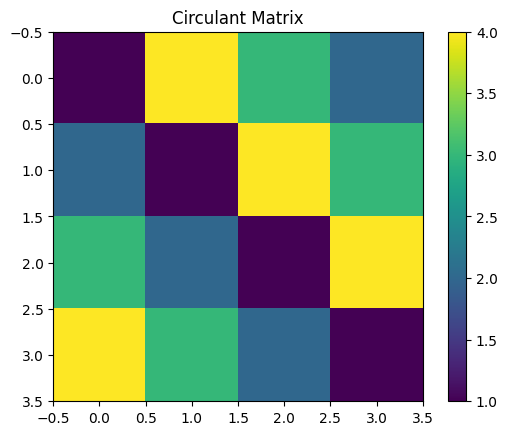

In [ ]:
import matplotlib.pyplot as plt

# Visualize the matrix
plt.imshow(C, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title("Circulant Matrix")
plt.show()


# Bayesian Neural Network with Fast Fourier Transforms of Circulant Matrices using Markov Chain Monte Carlo NUTS

In [ ]:
%%capture
!pip install numpyro jax scipy matplotlib

In [196]:
import jax.numpy as jnp
import numpyro
from numpyro import distributions as dist

def bnn_standard(X, y=None, task="classification"):
    """
    Standard Bayesian Neural Network for Classification or Regression.

    Args:
        X: Input features (shape: [batch_size, input_size]).
        y: Targets (shape: [batch_size]).
        task: "classification" or "regression".
    """
    # Input size and hidden layer size
    input_size = X.shape[1]
    hidden_size = 16  # You can modify this to adjust the hidden layer size

    # Define priors for the hidden layer weights and biases
    weights_hidden = numpyro.sample("weights_hidden", dist.Normal(0.0, 1.0).expand([input_size, hidden_size]))
    bias_hidden = numpyro.sample("bias_hidden", dist.Normal(0.0, 1.0).expand([hidden_size]))

    # Hidden layer
    hidden = jnp.dot(X, weights_hidden) + bias_hidden  # Dense layer
    hidden = jax.nn.relu(hidden)  # Apply non-linearity

    # Define priors for the output layer weights and biases
    weights_out = numpyro.sample("weights_out", dist.Normal(0.0, 1.0).expand([hidden_size, 1]))
    bias_out = numpyro.sample("bias_out", dist.Normal(0.0, 1.0))

    # Compute logits or mean
    logits_or_mean = jnp.dot(hidden, weights_out).squeeze() + bias_out

    # Define likelihood based on the task
    if task == "classification":
        # Use Bernoulli likelihood for binary classification
        numpyro.sample("obs", dist.Bernoulli(logits=logits_or_mean), obs=y)
    elif task == "regression":
        # Use Normal likelihood for regression
        sigma = numpyro.sample("sigma", dist.Exponential(1.0))  # Learnable variance
        numpyro.sample("obs", dist.Normal(logits_or_mean, sigma), obs=y)
    else:
        raise ValueError("Task must be 'classification' or 'regression'.")


In [250]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples, n_features = 500, 5
X = np.random.rand(n_samples, n_features) * 10  # Random features in range [0, 10]
true_beta = np.array([3.5, -2.1, 0.8, 4.2, -1.5])  # True coefficients
noise = np.random.normal(0, 2.0, size=n_samples)  # Gaussian noise

# Linear relationship
y = X @ true_beta + noise

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [251]:
import numpy as np
import jax
import jax.numpy as jnp
import numpyro
from numpyro import distributions as dist
from numpyro.infer import MCMC, NUTS
from scipy.linalg import circulant

def circulant_matrix_multiply(first_row, X):
    """
    Perform circulant matrix multiplication using FFT, supporting batch dimensions.

    Args:
        first_row: First row of the circulant matrix (shape: [num_samples, input_size]).
        X: Input matrix (shape: [num_test_samples, input_size]).

    Returns:
        Result of circulant matrix multiplication (shape: [num_samples, num_test_samples, input_size]).
    """
    # Ensure first_row has a batch dimension (expand if necessary)
    if first_row.ndim == 1:
        first_row = first_row[None, :]  # Expand to [1, input_size]

    # FFT of the first row for each posterior sample
    first_row_fft = jnp.fft.fft(first_row, axis=-1)  # Shape: [num_samples, input_size]

    # FFT of the input
    X_fft = jnp.fft.fft(X, axis=-1)  # Shape: [num_test_samples, input_size]

    # Perform element-wise multiplication in Fourier space and inverse FFT
    result_fft = first_row_fft[:, None, :] * X_fft[None, :, :]  # Broadcast multiplication
    result = jnp.fft.ifft(result_fft, axis=-1).real  # Shape: [num_samples, num_test_samples, input_size]

    return result



def bnn_circulant(X, y=None, task="classification"):
    """
    Bayesian Neural Network with Circulant Matrix Layer for Classification or Regression.

    Args:
        X: Input features (shape: [batch_size, input_size]).
        y: Targets (shape: [batch_size]).
        task: "classification" or "regression".
    """
    # Get input size
    input_size = X.shape[1]

    # Define priors for circulant matrix first row and biases
    first_row = numpyro.sample("first_row", dist.Normal(jnp.zeros(input_size), jnp.ones(input_size)))
    bias_circulant = numpyro.sample("bias_circulant", dist.Normal(0.0, 1.0))

    # Circulant layer
    hidden = circulant_matrix_multiply(first_row, X) + bias_circulant
    hidden = jax.nn.relu(hidden)  # Apply non-linearity

    # Define priors for the linear output layer
    # Reshape the hidden layer to have shape (batch_size, hidden_features)
    hidden = hidden.reshape(X.shape[0], -1)  # Assuming hidden_features = input_size

    # Sample weights with shape (hidden_features, output_features)
    weights_out = numpyro.sample("weights_out", dist.Normal(0.0, 1.0).expand([hidden.shape[1], 1]))
    bias_out = numpyro.sample("bias_out", dist.Normal(0.0, 1.0))

    # Output layer
    logits_or_mean = jnp.matmul(hidden, weights_out).squeeze() + bias_out


    # Define likelihood based on the task
    if task == "classification":
        # Use Bernoulli likelihood for binary classification
        numpyro.sample("obs", dist.Bernoulli(logits=logits_or_mean), obs=y)
    elif task == "regression":
        # Use Normal likelihood for regression
        sigma = numpyro.sample("sigma", dist.Exponential(1.0))  # Learnable variance
        numpyro.sample("obs", dist.Normal(logits_or_mean, sigma), obs=y)
    else:
        raise ValueError("Task must be 'classification' or 'regression'.")



In [252]:
# Define NUTS sampler
nuts_kernel = NUTS(bnn_circulant)

# Run MCMC for regression
mcmc = MCMC(nuts_kernel, num_warmup=250, num_samples=500)
mcmc.run(jax.random.PRNGKey(0), X=jnp.array(X_train), y=jnp.array(y_train), task="regression")





sample: 100%|██████████| 750/750 [01:33<00:00,  8.02it/s, 1023 steps of size 1.45e-03. acc. prob=0.95]


In [253]:
def predict_cc(posterior_samples, X, task="classification"):
    """
    Predict using posterior samples.

    Args:
        posterior_samples: Posterior samples from MCMC.
        X: Input features (shape: [num_test_samples, input_size]).
        task: "classification" or "regression".

    Returns:
        Predicted probabilities for classification or predicted mean and uncertainty for regression.
    """
    # Extract posterior samples
    first_row = posterior_samples["first_row"]  # Shape: [num_samples, input_size]
    bias_circulant = posterior_samples["bias_circulant"]  # Shape: [num_samples]
    weights_out = posterior_samples["weights_out"]  # Shape: [num_samples, hidden_features, 1]
    bias_out = posterior_samples["bias_out"]  # Shape: [num_samples]

    # Circulant layer
    hidden = circulant_matrix_multiply(first_row, X)  # Shape: [num_samples, num_test_samples, input_size]
    hidden = hidden + bias_circulant[:, None, None]  # Add bias_circulant
    hidden = jax.nn.relu(hidden)  # Apply non-linearity
    hidden = hidden.reshape(hidden.shape[0], hidden.shape[1], -1)  # Flatten last dimension

    # Output layer
    logits_or_mean = jnp.einsum("sni,sio->sno", hidden, weights_out).squeeze(-1)  # Shape: [num_samples, num_test_samples]
    logits_or_mean += bias_out[:, None]  # Add bias_out

    if task == "classification":
        # Compute posterior predictive probabilities
        probabilities = jax.nn.sigmoid(logits_or_mean)  # Shape: [num_samples, num_test_samples]
        mean_probs = jnp.mean(probabilities, axis=0)  # Shape: [num_test_samples]
        return mean_probs
    elif task == "regression":
        # Compute posterior predictive mean and standard deviation
        mean = jnp.mean(logits_or_mean, axis=0)  # Shape: [num_test_samples]
        std = jnp.std(logits_or_mean, axis=0)  # Shape: [num_test_samples]
        return mean, std
    else:
        raise ValueError("Task must be 'classification' or 'regression'.")


In [211]:
def predict_normal(posterior_samples, X_test, task="regression"):
    """
    Predicts the outputs (and optionally uncertainty for regression) for a Bayesian Neural Network.

    Args:
        posterior_samples: Samples from the posterior distribution (from MCMC).
        X_test: Test data (shape: [num_samples, input_size]).
        task: Task type ("classification" or "regression").

    Returns:
        If task is "regression":
            mean: Mean predictions across posterior samples (shape: [num_samples]).
            std: Standard deviation of predictions (shape: [num_samples]).
        If task is "classification":
            probs: Predicted probabilities for the positive class (shape: [num_samples]).
    """
    predictions = []

    # Loop over posterior samples to compute predictions
    for i in range(len(posterior_samples["weights_hidden"])):
        # Extract weights and biases for this sample
        weights_hidden = posterior_samples["weights_hidden"][i]
        bias_hidden = posterior_samples["bias_hidden"][i]
        weights_out = posterior_samples["weights_out"][i]
        bias_out = posterior_samples["bias_out"][i]

        # Forward pass
        hidden = jnp.dot(X_test, weights_hidden) + bias_hidden
        hidden = jax.nn.relu(hidden)
        logits_or_mean = jnp.dot(hidden, weights_out).squeeze() + bias_out

        # Store predictions based on task
        if task == "regression":
            predictions.append(logits_or_mean)
        elif task == "classification":
            probs = jax.nn.sigmoid(logits_or_mean)  # Convert logits to probabilities
            predictions.append(probs)
        else:
            raise ValueError("Task must be 'classification' or 'regression'.")

    # Convert list of predictions to JAX array
    predictions = jnp.array(predictions)

    if task == "regression":
        # Compute mean and standard deviation for regression
        mean = jnp.mean(predictions, axis=0)
        std = jnp.std(predictions, axis=0)
        return mean, std
    elif task == "classification":
        # Compute mean probabilities for classification
        probs = jnp.mean(predictions, axis=0)
        return probs


In [254]:
# Extract posterior samples from the MCMC run
posterior_samples = mcmc.get_samples()

In [255]:
# Extract posterior samples from the MCMC run
posterior_samples = mcmc.get_samples()

# Use predict_normal for standard BNNs
mean, std = predict_cc(posterior_samples, jnp.array(X_test), task="regression")

print("Mean predictions:", mean)
print("Predictive uncertainty (std):", std)

final_predictions = mean

Mean predictions: [ 20.483492     7.863559    52.460327    27.175951    43.371815
   3.0304034   33.668552    16.39186     20.959116    11.162153
  41.16422     17.94697     30.613564    31.63371     21.085344
  19.501806    27.340832    33.45475     10.806417    13.832707
  -0.54775244  15.379019    23.850212     3.026612    20.469149
  16.96709     50.11055     10.082249    22.166689    23.736204
  16.491003    29.37943     25.821407    39.781994    -6.5419374
  25.459852    51.45357     10.741078    53.28018     20.014517
  32.354507     9.126045    36.53844     22.703176    16.739044
  42.90538     21.873089    29.045214    58.75509     38.966682
  12.438088    29.057873    20.278507    34.08762     16.389809
  23.38616     33.768112     7.404682    52.14898     56.37036
  17.368269    16.053831    20.020678    21.318008    37.796104
  29.713766    19.410887    39.661118    18.660809    37.14834
  17.203314     8.345082    30.105488    35.104885     0.70135504
 -17.626945    25.820

In [256]:
from sklearn.linear_model import LinearRegression

# Train linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
lin_reg_predictions = lin_reg.predict(X_test)

In [257]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate Bayesian model
bayesian_mse = mean_squared_error(y_test, final_predictions)
bayesian_mae = mean_absolute_error(y_test, final_predictions)
bayesian_r2 = r2_score(y_test, final_predictions)

# Evaluate Linear Regression
lin_reg_mse = mean_squared_error(y_test, lin_reg_predictions)
lin_reg_mae = mean_absolute_error(y_test, lin_reg_predictions)
lin_reg_r2 = r2_score(y_test, lin_reg_predictions)

# Print results
print("Bayesian Model Performance:")
print(f"  MSE: {bayesian_mse:.3f}, MAE: {bayesian_mae:.3f}, R^2: {bayesian_r2:.3f}")

print("Linear Regression Performance:")
print(f"  MSE: {lin_reg_mse:.3f}, MAE: {lin_reg_mae:.3f}, R^2: {lin_reg_r2:.3f}")

Bayesian Model Performance:
  MSE: 3.485, MAE: 1.468, R^2: 0.985
Linear Regression Performance:
  MSE: 3.490, MAE: 1.470, R^2: 0.985


In [258]:
lower_bound = mean - 1.96 * std
upper_bound = mean + 1.96 * std

coverage = ((y_test >= lower_bound) & (y_test <= upper_bound)).mean()
print("Bayesian Model 95% CI Coverage:", coverage)


Bayesian Model 95% CI Coverage: 0.19999999


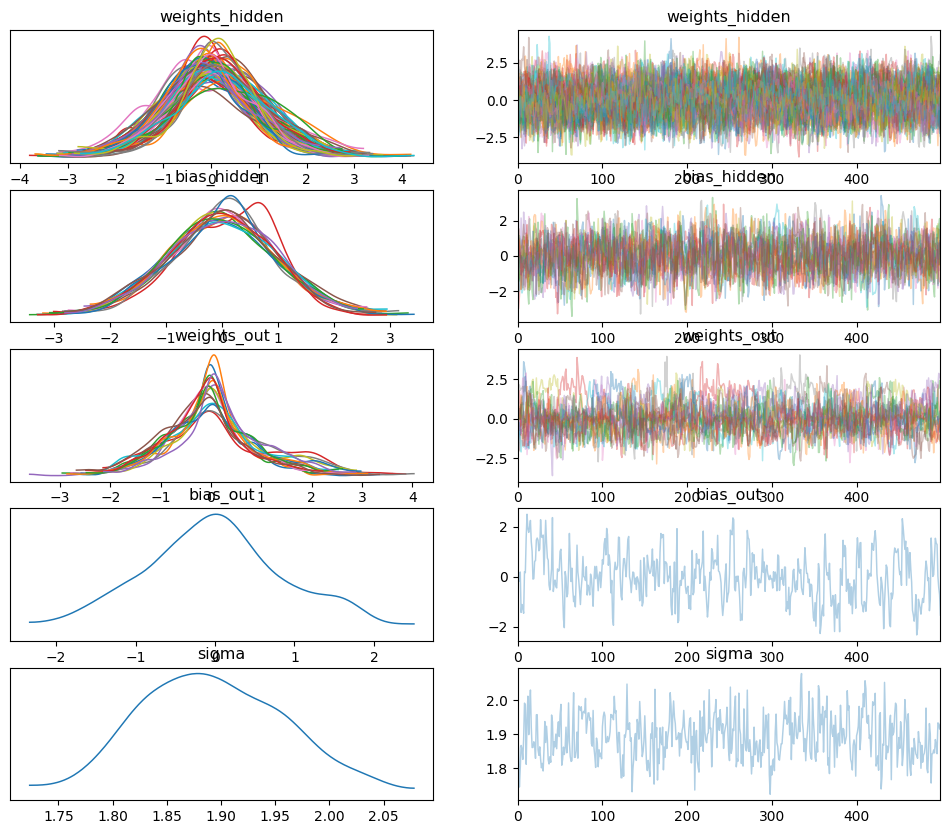

In [217]:
import arviz as az

# Convert posterior samples to an ArviZ InferenceData object
posterior = az.from_numpyro(mcmc)

# Plot trace for regression-specific parameters
az.plot_trace(posterior, var_names=["weights_hidden", "bias_hidden", "weights_out", "bias_out", "sigma"])
plt.show()


## Circulant Matrix FFT

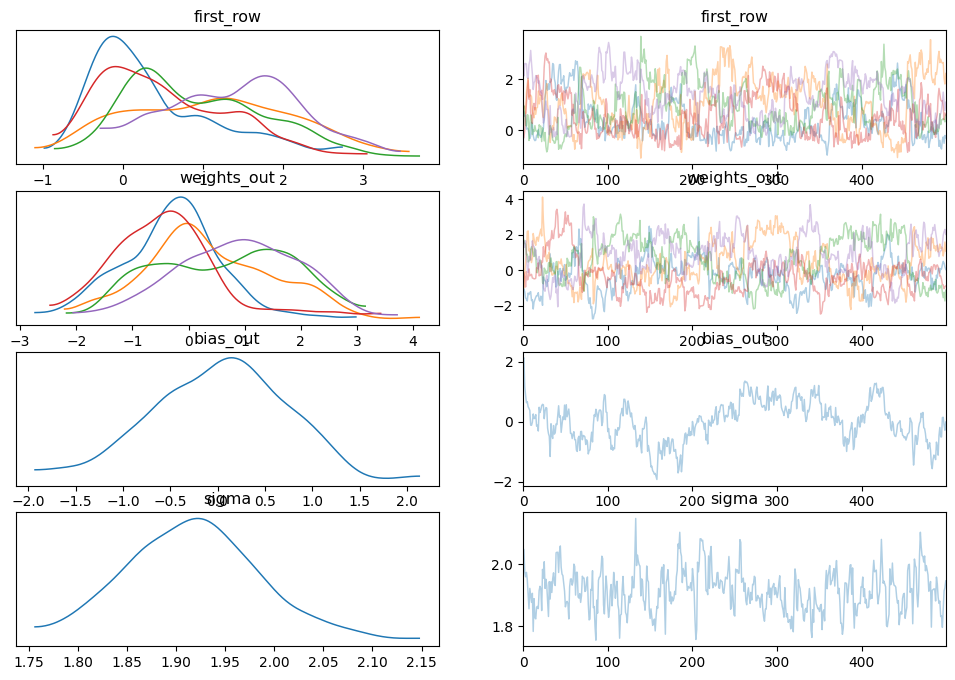

In [259]:
import arviz as az

# Convert posterior samples to an ArviZ InferenceData object
posterior = az.from_numpyro(mcmc)

# Plot trace for all parameters
az.plot_trace(posterior, var_names=["first_row", "weights_out", "bias_out", "sigma"])
plt.show()


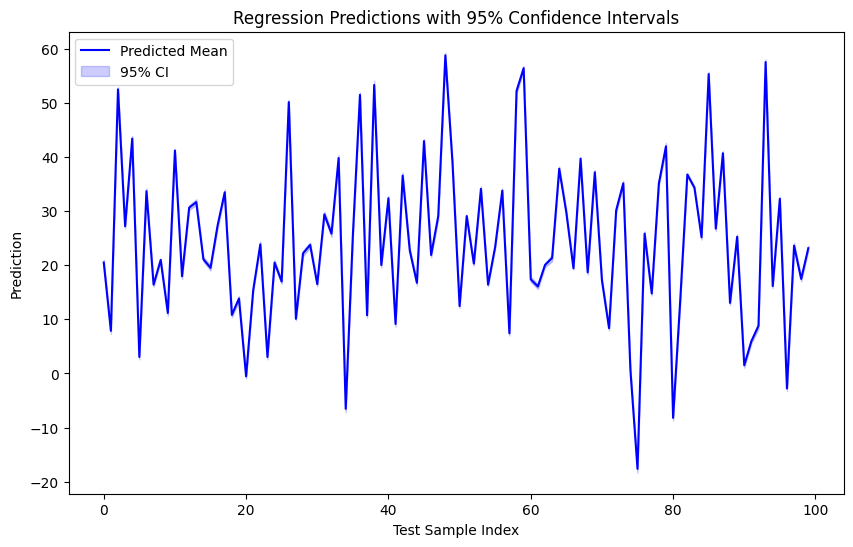

In [260]:
# Plot mean predictions with 95% CI
plt.figure(figsize=(10, 6))
plt.plot(mean, label="Predicted Mean", color="blue")
plt.fill_between(range(len(mean)), lower_bound, upper_bound, color="blue", alpha=0.2, label="95% CI")
plt.title("Regression Predictions with 95% Confidence Intervals")
plt.xlabel("Test Sample Index")
plt.ylabel("Prediction")
plt.legend()
plt.show()


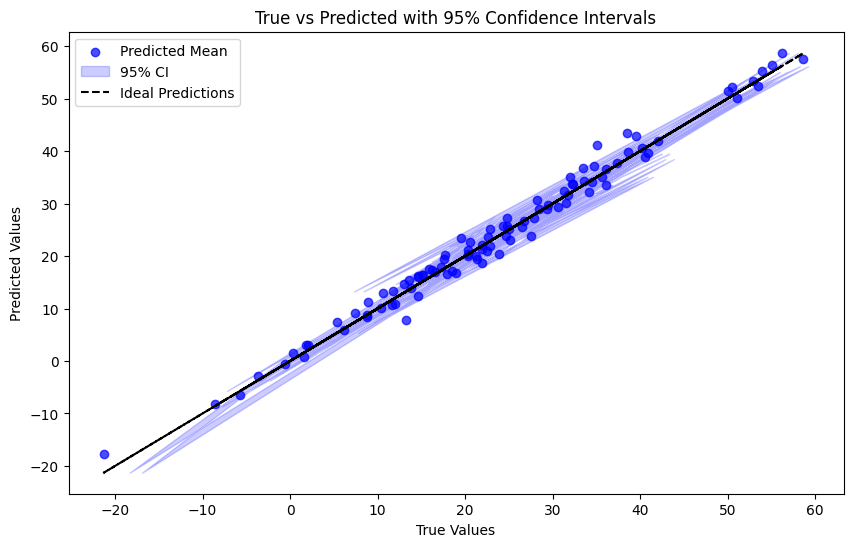

In [261]:
# Plot predictions vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, mean, label="Predicted Mean", color="blue", alpha=0.7)
plt.fill_betweenx(y_test, lower_bound, upper_bound, color="blue", alpha=0.2, label="95% CI")
plt.plot(y_test, y_test, color="black", linestyle="--", label="Ideal Predictions")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("True vs Predicted with 95% Confidence Intervals")
plt.show()


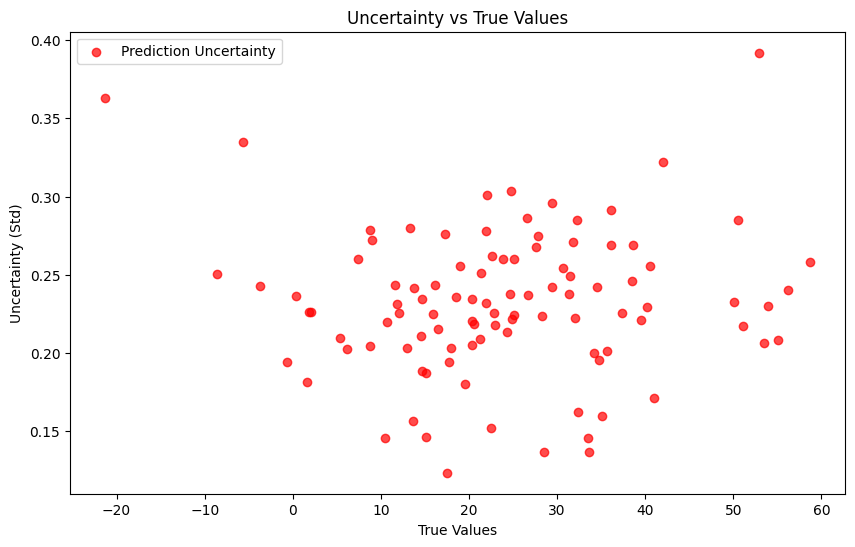

In [262]:
# Plot uncertainty (std) vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, std, label="Prediction Uncertainty", color="red", alpha=0.7)
plt.xlabel("True Values")
plt.ylabel("Uncertainty (Std)")
plt.title("Uncertainty vs True Values")
plt.legend()
plt.show()


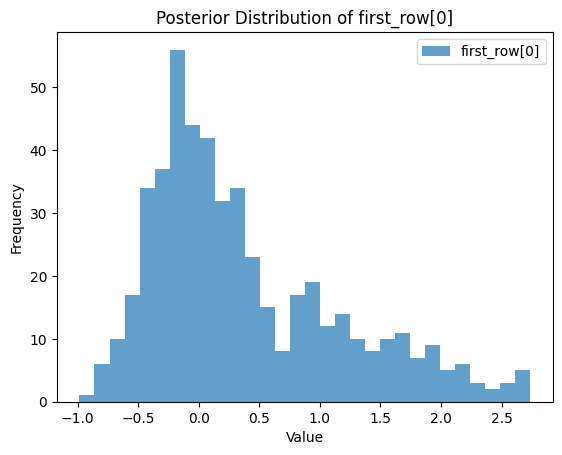

In [263]:
import matplotlib.pyplot as plt
# Plot posterior for "first_row"
plt.hist(posterior_samples["first_row"][:, 0], bins=30, alpha=0.7, label="first_row[0]")
plt.title("Posterior Distribution of first_row[0]")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()



Prediction: 20.48, 95% CI: [19.97, 20.99]
Prediction: 7.86, 95% CI: [7.32, 8.41]
Prediction: 52.46, 95% CI: [52.06, 52.86]
Prediction: 27.18, 95% CI: [26.74, 27.61]
Prediction: 43.37, 95% CI: [42.89, 43.85]


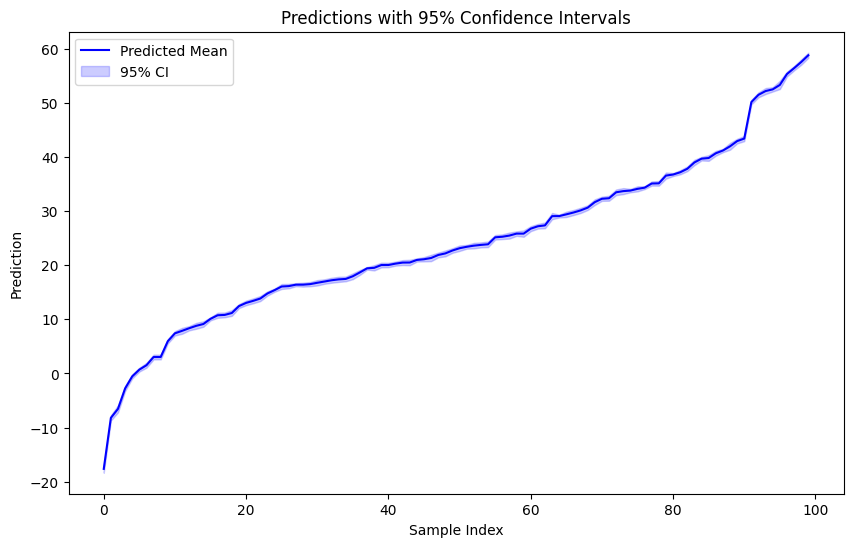

In [265]:
import scipy

def compute_confidence_intervals(mean, std, confidence=0.95):
    """
    Compute confidence intervals for a Gaussian posterior predictive distribution.

    Args:
        mean: Predicted mean (array of shape [n_samples]).
        std: Predicted standard deviation (array of shape [n_samples]).
        confidence: Confidence level (e.g., 0.95 for 95% CI).

    Returns:
        lower_bound: Lower bound of the confidence interval.
        upper_bound: Upper bound of the confidence interval.
    """
    # Z-score for the given confidence level
    z = scipy.stats.norm.ppf(1 - (1 - confidence) / 2)

    # Compute confidence intervals
    lower_bound = mean - z * std
    upper_bound = mean + z * std
    return lower_bound, upper_bound


from scipy.stats import norm


# Compute 95% confidence intervals
lower_bound, upper_bound = compute_confidence_intervals(mean, std, confidence=0.95)

# Print results
for i in range(5):  # Show for first 5 predictions
    print(f"Prediction: {mean[i]:.2f}, 95% CI: [{lower_bound[i]:.2f}, {upper_bound[i]:.2f}]")


import matplotlib.pyplot as plt

# Sort predictions for visualization
sorted_indices = np.argsort(mean)
sorted_mean = mean[sorted_indices]
sorted_std = std[sorted_indices]
sorted_lower = lower_bound[sorted_indices]
sorted_upper = upper_bound[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_mean, label="Predicted Mean", color="blue")
plt.fill_between(range(len(sorted_mean)), sorted_lower, sorted_upper, color="blue", alpha=0.2, label="95% CI")
plt.title("Predictions with 95% Confidence Intervals")
plt.xlabel("Sample Index")
plt.ylabel("Prediction")
plt.legend()
plt.show()


## For classification

In [223]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0,
                            n_clusters_per_class=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features for better numerical stability
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)


Training Data Shape: (800, 10)
Test Data Shape: (200, 10)


In [225]:
from numpyro.infer import MCMC, NUTS

# Define NUTS sampler
nuts_kernel = NUTS(bnn_standard)

# Run MCMC
mcmc = MCMC(nuts_kernel, num_warmup=250, num_samples=500)
mcmc.run(jax.random.PRNGKey(0), X=jnp.array(X_train), y=jnp.array(y_train), task="classification")

# Get posterior samples
posterior_samples = mcmc.get_samples()



sample: 100%|██████████| 750/750 [00:40<00:00, 18.74it/s, 255 steps of size 1.93e-02. acc. prob=0.77]


In [228]:
from sklearn.metrics import accuracy_score, log_loss

probs = predict_normal(posterior_samples, jnp.array(X_test), task="classification")

# Convert probabilities to binary predictions
y_pred = (probs > 0.5).astype(int)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute log loss
log_loss_value = log_loss(y_test, probs)

print(f"BNN Accuracy: {accuracy:.3f}")
print(f"BNN Log Loss: {log_loss_value:.3f}")


BNN Accuracy: 0.905
BNN Log Loss: 0.349


In [229]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit logistic regression
logreg = LogisticRegression(random_state=42, solver="lbfgs")
logreg.fit(X_train, y_train)

# Predict probabilities for the test set
logreg_probs = logreg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Predict binary outcomes
logreg_preds = logreg.predict(X_test)

from sklearn.metrics import accuracy_score, log_loss

# Compute accuracy
logreg_accuracy = accuracy_score(y_test, logreg_preds)

# Compute log loss
logreg_log_loss = log_loss(y_test, logreg_probs)

print(f"Logistic Regression Accuracy: {logreg_accuracy:.3f}")
print(f"Logistic Regression Log Loss: {logreg_log_loss:.3f}")


Logistic Regression Accuracy: 0.770
Logistic Regression Log Loss: 0.560


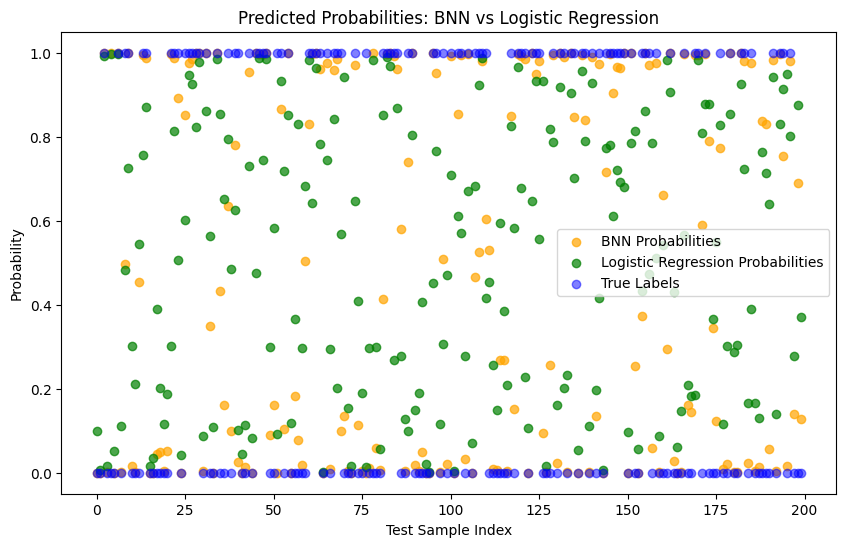

In [230]:
import matplotlib.pyplot as plt

# Plot probabilities from BNN and Logistic Regression
plt.figure(figsize=(10, 6))
plt.scatter(range(len(probs)), probs, label="BNN Probabilities", color="orange", alpha=0.7)
plt.scatter(range(len(logreg_probs)), logreg_probs, label="Logistic Regression Probabilities", color="green", alpha=0.7)
plt.scatter(range(len(y_test)), y_test, label="True Labels", color="blue", alpha=0.5)
plt.xlabel("Test Sample Index")
plt.ylabel("Probability")
plt.legend()
plt.title("Predicted Probabilities: BNN vs Logistic Regression")
plt.show()


In [231]:
print(f"BNN Accuracy: {accuracy:.3f}, Log Loss: {log_loss_value:.3f}")
print(f"Logistic Regression Accuracy: {logreg_accuracy:.3f}, Log Loss: {logreg_log_loss:.3f}")


BNN Accuracy: 0.905, Log Loss: 0.349
Logistic Regression Accuracy: 0.770, Log Loss: 0.560


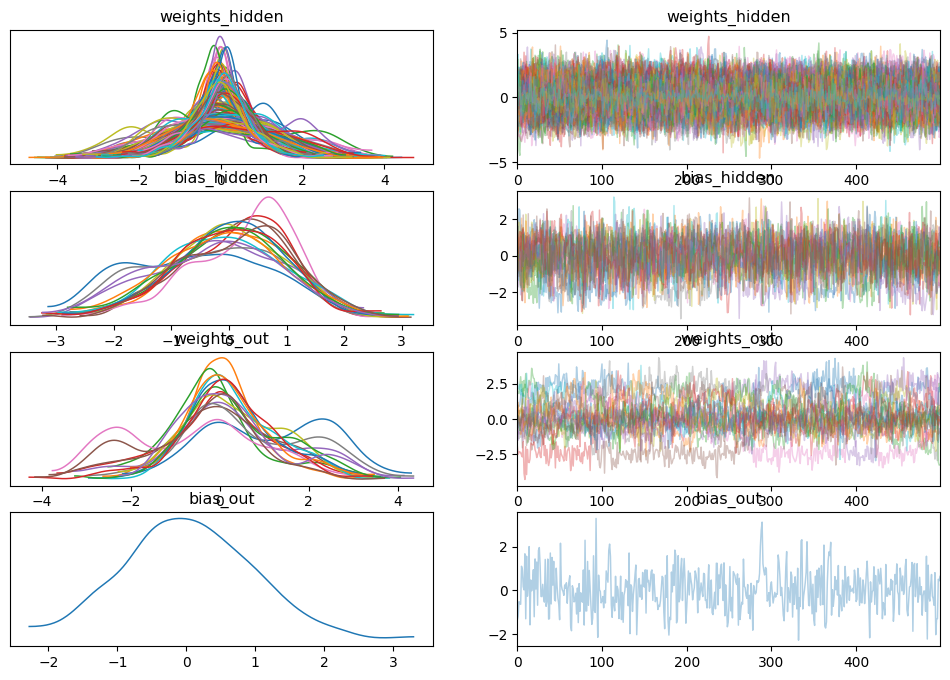

In [232]:
import arviz as az

# Convert posterior samples to an ArviZ InferenceData object
posterior = az.from_numpyro(mcmc)

# Plot trace for classification-specific parameters
az.plot_trace(posterior, var_names=["weights_hidden", "bias_hidden", "weights_out", "bias_out"])
plt.show()


## For circulant matrices

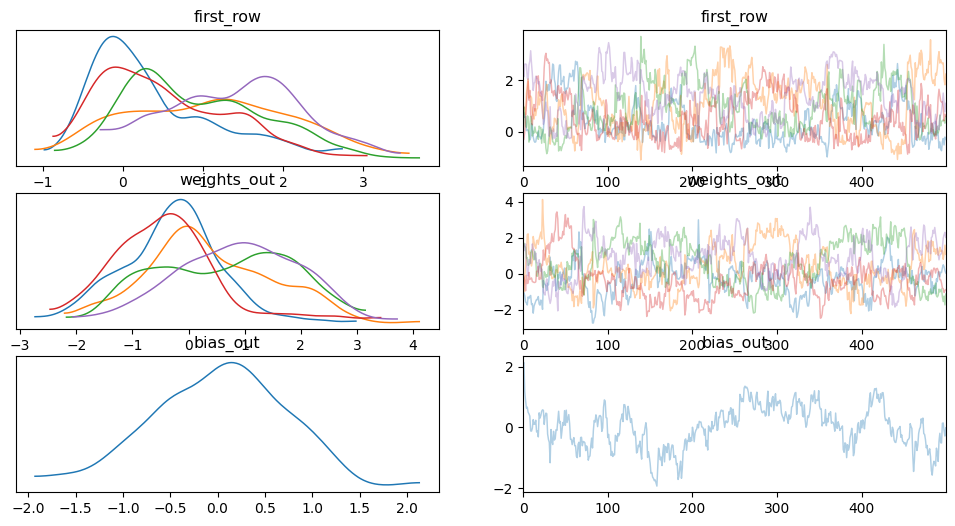

In [ ]:
# Plot trace for classification parameters
az.plot_trace(posterior, var_names=["first_row", "weights_out", "bias_out"])
plt.show()


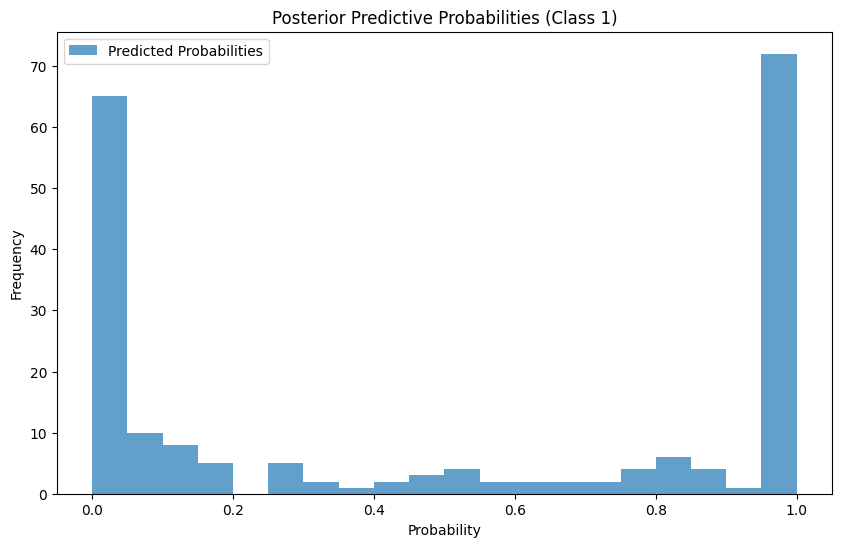

In [233]:
probs = predict(posterior_samples, jnp.array(X_test), task="classification")

# Plot predicted probabilities for one class
plt.figure(figsize=(10, 6))
plt.hist(probs, bins=20, alpha=0.7, label="Predicted Probabilities")
plt.title("Posterior Predictive Probabilities (Class 1)")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.legend()
plt.show()


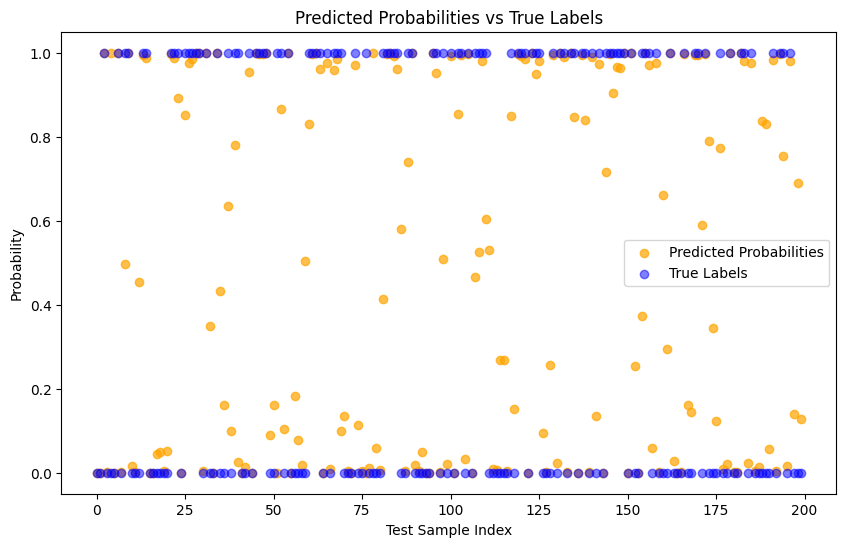

In [234]:
# Scatter plot of predicted probabilities vs true labels
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), probs, label="Predicted Probabilities", color="orange", alpha=0.7)
plt.scatter(range(len(y_test)), y_test, label="True Labels", color="blue", alpha=0.5)
plt.xlabel("Test Sample Index")
plt.ylabel("Probability")
plt.legend()
plt.title("Predicted Probabilities vs True Labels")
plt.show()


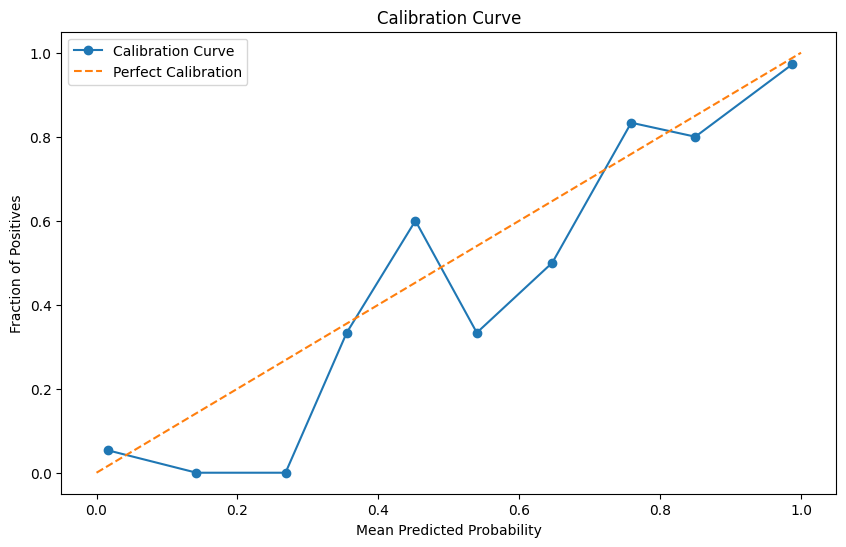

In [235]:
from sklearn.calibration import calibration_curve

# Compute calibration curve
true_probs, mean_pred_probs = calibration_curve(y_test, probs, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(10, 6))
plt.plot(mean_pred_probs, true_probs, marker="o", label="Calibration Curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect Calibration")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.legend()
plt.show()


## Multiclass Classification

In [236]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic multiclass dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0,
                            n_classes=3, n_clusters_per_class=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features for better numerical stability
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)
print("Training Labels Distribution:", np.bincount(y_train))
print("Test Labels Distribution:", np.bincount(y_test))


Training Data Shape: (800, 10)
Test Data Shape: (200, 10)
Training Labels Distribution: [268 263 269]
Test Labels Distribution: [64 70 66]


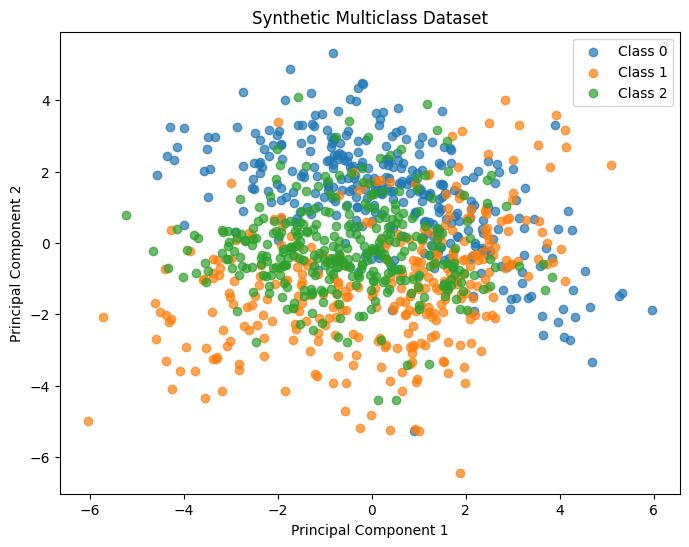

In [237]:
# For visualization, reduce dimensions to 2 using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the reduced dataset
plt.figure(figsize=(8, 6))
for class_idx in np.unique(y):
    plt.scatter(X_reduced[y == class_idx, 0], X_reduced[y == class_idx, 1], label=f"Class {class_idx}", alpha=0.7)
plt.title("Synthetic Multiclass Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


In [238]:
def bnn_standard_multiclass(X, y=None, task="classification", n_classes=3):
    """
    Standard Bayesian Neural Network for Multiclass Classification.

    Args:
        X: Input features (shape: [batch_size, input_size]).
        y: Targets (shape: [batch_size]).
        task: "classification".
        n_classes: Number of output classes.
    """
    # Input feature size
    input_size = X.shape[1]
    hidden_size = 16  # Define a hidden layer size (modifiable)

    # Define priors for hidden layer weights and biases
    weights_hidden = numpyro.sample("weights_hidden", dist.Normal(0.0, 1.0).expand([input_size, hidden_size]))
    bias_hidden = numpyro.sample("bias_hidden", dist.Normal(0.0, 1.0).expand([hidden_size]))

    # Hidden layer transformation
    hidden = jnp.dot(X, weights_hidden) + bias_hidden  # Shape: [batch_size, hidden_size]
    hidden = jax.nn.relu(hidden)  # Apply non-linearity

    # Define priors for output layer weights and biases
    weights_out = numpyro.sample("weights_out", dist.Normal(0.0, 1.0).expand([hidden_size, n_classes]))
    bias_out = numpyro.sample("bias_out", dist.Normal(0.0, 1.0).expand([n_classes]))

    # Compute logits
    logits = jnp.dot(hidden, weights_out) + bias_out  # Shape: [batch_size, n_classes]

    # Define likelihood for multiclass classification
    if task == "classification":
        numpyro.sample("obs", dist.Categorical(logits=logits), obs=y)
    else:
        raise ValueError("Task must be 'classification'.")


In [ ]:
def bnn_circulant_multiclass(X, y=None, task="classification", n_classes=3):
    """
    Bayesian Neural Network with Circulant Matrix Layer for Multiclass Classification.

    Args:
        X: Input features (shape: [batch_size, input_size]).
        y: Targets (shape: [batch_size]).
        task: "classification".
        n_classes: Number of output classes.
    """
    # Input feature size
    input_size = X.shape[1]

    # Define priors for circulant matrix
    first_row = numpyro.sample("first_row", dist.Normal(jnp.zeros(input_size), jnp.ones(input_size)))
    bias_circulant = numpyro.sample("bias_circulant", dist.Normal(0.0, 1.0))

    # Circulant transformation
    hidden = circulant_matrix_multiply(first_row, X) + bias_circulant  # Shape: [batch_size, input_size]
    hidden = jax.nn.relu(hidden)

    # Define priors for output layer weights and biases
    weights_out = numpyro.sample("weights_out", dist.Normal(0.0, 1.0).expand([input_size, n_classes]))
    bias_out = numpyro.sample("bias_out", dist.Normal(0.0, 1.0).expand([n_classes]))

    # Compute logits
    logits = jnp.dot(hidden, weights_out) + bias_out  # Shape: [batch_size, n_classes]


    # Define likelihood for multiclass classification
    if task == "classification":
        numpyro.sample("obs", dist.Categorical(logits=logits), obs=y)
    else:
        raise ValueError("Task must be 'classification'.")


In [239]:
# Define NUTS sampler
nuts_kernel = NUTS(bnn_standard_multiclass)

# Run MCMC
mcmc = MCMC(nuts_kernel, num_warmup=250, num_samples=500)
mcmc.run(jax.random.PRNGKey(0), X=jnp.array(X_train), y=jnp.array(y_train), task="classification", n_classes=10)

# Get posterior samples
posterior_samples = mcmc.get_samples()



sample: 100%|██████████| 750/750 [01:22<00:00,  9.05it/s, 511 steps of size 1.15e-02. acc. prob=0.86]


In [ ]:
def predict_multiclass_cc(posterior_samples, X, task="classification", n_classes=3):
    """
    Predict using posterior samples for multiclass classification.

    Args:
        posterior_samples: Posterior samples from MCMC.
        X: Input features (shape: [num_test_samples, input_size]).
        task: "classification".
        n_classes: Number of output classes.

    Returns:
        Predicted probabilities for each class (shape: [num_test_samples, n_classes]).
    """
    first_row = posterior_samples["first_row"]
    bias_circulant = posterior_samples["bias_circulant"]
    weights_out = posterior_samples["weights_out"]
    bias_out = posterior_samples["bias_out"]

    # Circulant transformation
    hidden = circulant_matrix_multiply(first_row, X)
    hidden = hidden + bias_circulant[:, None, None]
    hidden = jax.nn.relu(hidden)

    # Compute logits
    logits = jnp.einsum("sni,sio->sno", hidden, weights_out) + bias_out[:, None, :]
    probs = jax.nn.softmax(logits, axis=-1)
    return jnp.mean(probs, axis=0)


In [240]:
def predict_multiclass(posterior_samples, X, task="classification", n_classes=3):
    """
    Predict using posterior samples for multiclass classification.

    Args:
        posterior_samples: Posterior samples from MCMC.
        X: Input features (shape: [num_test_samples, input_size]).
        task: "classification".
        n_classes: Number of output classes.

    Returns:
        Predicted probabilities for each class (shape: [num_test_samples, n_classes]).
    """
    if task != "classification":
        raise ValueError("This function supports only 'classification' tasks.")

    # Initialize a list to store probabilities from each posterior sample
    probs_list = []

    # Loop over all posterior samples
    for i in range(len(posterior_samples["weights_hidden"])):
        # Extract the weights and biases for this sample
        weights_hidden = posterior_samples["weights_hidden"][i]
        bias_hidden = posterior_samples["bias_hidden"][i]
        weights_out = posterior_samples["weights_out"][i]
        bias_out = posterior_samples["bias_out"][i]

        # Forward pass: Compute hidden layer
        hidden = jnp.dot(X, weights_hidden) + bias_hidden  # Shape: [num_test_samples, hidden_size]
        hidden = jax.nn.relu(hidden)  # Apply ReLU activation

        # Compute logits for the output layer
        logits = jnp.dot(hidden, weights_out) + bias_out  # Shape: [num_test_samples, n_classes]

        # Convert logits to probabilities
        probs = jax.nn.softmax(logits, axis=-1)  # Shape: [num_test_samples, n_classes]

        # Append probabilities to the list
        probs_list.append(probs)

    # Stack all probabilities and compute the mean across posterior samples
    probs_stack = jnp.stack(probs_list, axis=0)  # Shape: [num_samples, num_test_samples, n_classes]
    mean_probs = jnp.mean(probs_stack, axis=0)  # Shape: [num_test_samples, n_classes]

    return mean_probs


In [241]:
# Predict probabilities
probs_bnn = predict_multiclass(posterior_samples, jnp.array(X_test), task="classification", n_classes=10)

# Predicted classes
y_pred_bnn = jnp.argmax(probs_bnn, axis=1)

# Evaluate
from sklearn.metrics import accuracy_score, log_loss
accuracy_bnn = accuracy_score(y_test, y_pred_bnn)
log_loss_bnn = log_loss(y_test, probs_bnn, labels=np.arange(10))

print("Bayesian Neural Network Performance:")
print(f"  Accuracy: {accuracy_bnn:.3f}")
print(f"  Log Loss: {log_loss_bnn:.3f}")


Bayesian Neural Network Performance:
  Accuracy: 0.890
  Log Loss: 0.421


In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, log_loss

# Fit logistic regression (multiclass handled automatically by scikit-learn)
logreg = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Predict probabilities and classes
probs_logreg = logreg.predict_proba(X_test)  # Predicted probabilities
y_pred_logreg = logreg.predict(X_test)      # Predicted classes

# Evaluate logistic regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
log_loss_logreg = log_loss(y_test, probs_logreg)

print("Logistic Regression Performance:")
print(f"  Accuracy: {accuracy_logreg:.3f}")
print(f"  Log Loss: {log_loss_logreg:.3f}")



Logistic Regression Performance:
  Accuracy: 0.715
  Log Loss: 0.778


In [243]:
print("Comparison of Model Performance:")
print(f"BNN Accuracy: {accuracy_bnn:.3f}, Log Loss: {log_loss_bnn:.3f}")
print(f"Logistic Regression Accuracy: {accuracy_logreg:.3f}, Log Loss: {log_loss_logreg:.3f}")


Comparison of Model Performance:
BNN Accuracy: 0.890, Log Loss: 0.421
Logistic Regression Accuracy: 0.715, Log Loss: 0.778


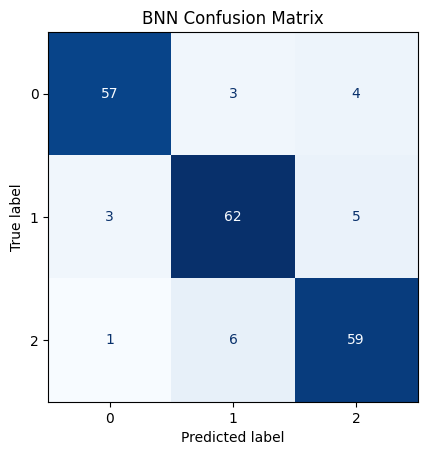

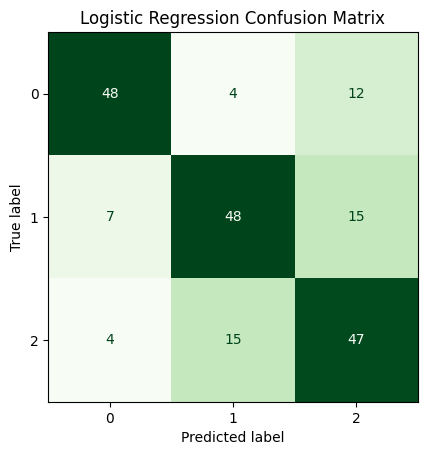

In [244]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix for BNN
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bnn, cmap="Blues", colorbar=False)
plt.title("BNN Confusion Matrix")
plt.show()

# Confusion matrix for Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg, cmap="Greens", colorbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.show()


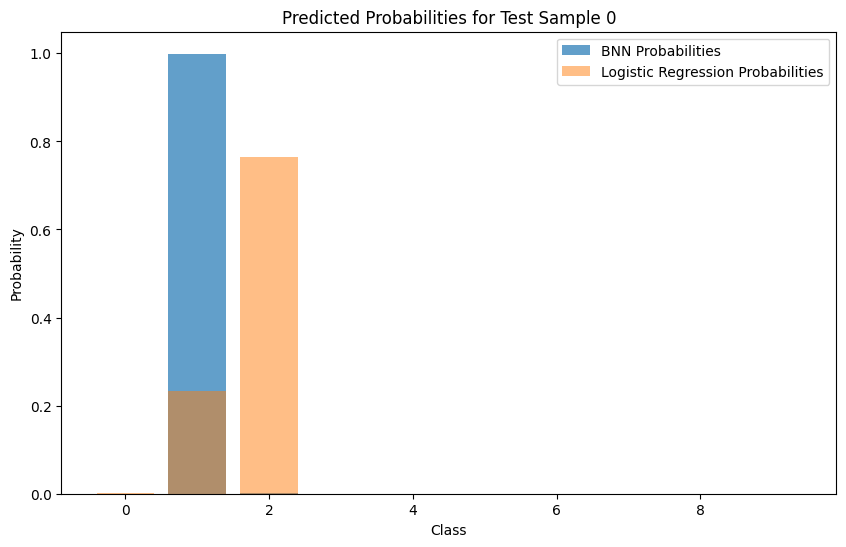

In [245]:
# Plot predicted probabilities for a single test sample
sample_idx = 0  # Change this to visualize other test samples

plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(probs_bnn[sample_idx])), probs_bnn[sample_idx], alpha=0.7, label="BNN Probabilities")
plt.bar(np.arange(len(probs_logreg[sample_idx])), probs_logreg[sample_idx], alpha=0.5, label="Logistic Regression Probabilities")
plt.title(f"Predicted Probabilities for Test Sample {sample_idx}")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.legend()
plt.show()


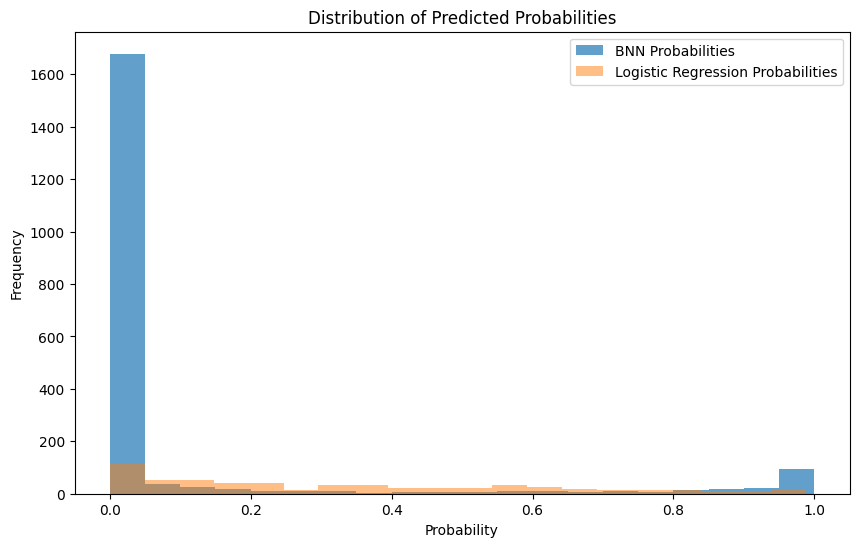

In [246]:
plt.figure(figsize=(10, 6))
plt.hist(probs_bnn.flatten(), bins=20, alpha=0.7, label="BNN Probabilities")
plt.hist(probs_logreg.flatten(), bins=20, alpha=0.5, label="Logistic Regression Probabilities")
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.legend()
plt.show()


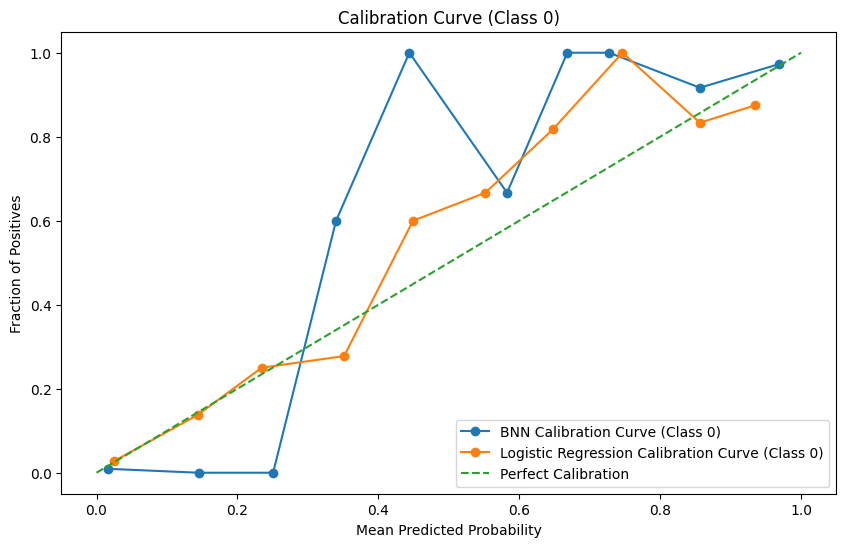

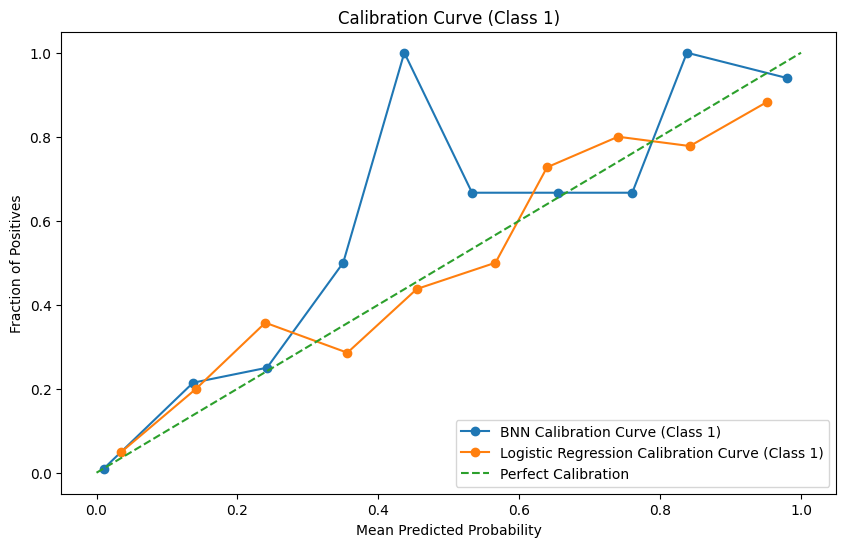

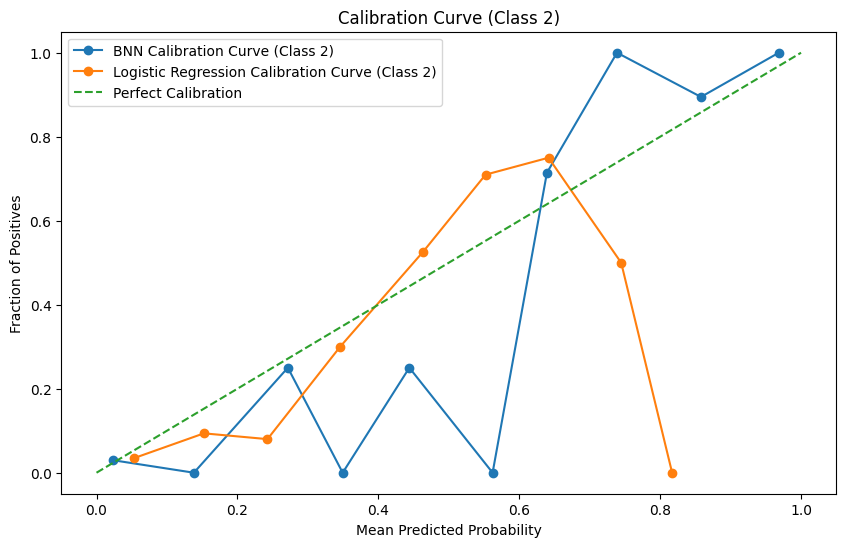

In [247]:
from sklearn.calibration import calibration_curve

# Compute calibration curves for class 0, 1 and 2
for i in range(3): # iterate through each class (0, 1, 2)
    bnn_true_probs, bnn_mean_pred_probs = calibration_curve(
        (y_test == i).astype(int),  # Convert y_test to binary for each class
        probs_bnn[:, i],  # Select probabilities for the current class
        n_bins=10,
        pos_label=1  # Explicitly set positive label to 1
    )
    logreg_true_probs, logreg_mean_pred_probs = calibration_curve(
        (y_test == i).astype(int),  # Convert y_test to binary for each class
        probs_logreg[:, i],  # Select probabilities for the current class
        n_bins=10,
        pos_label=1  # Explicitly set positive label to 1
    )

    # Plot calibration curves for the current class
    plt.figure(figsize=(10, 6))
    plt.plot(bnn_mean_pred_probs, bnn_true_probs, marker="o", label=f"BNN Calibration Curve (Class {i})")
    plt.plot(logreg_mean_pred_probs, logreg_true_probs, marker="o", label=f"Logistic Regression Calibration Curve (Class {i})")
    plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect Calibration")
    plt.title(f"Calibration Curve (Class {i})")
    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("Fraction of Positives")
    plt.legend()
    plt.show()


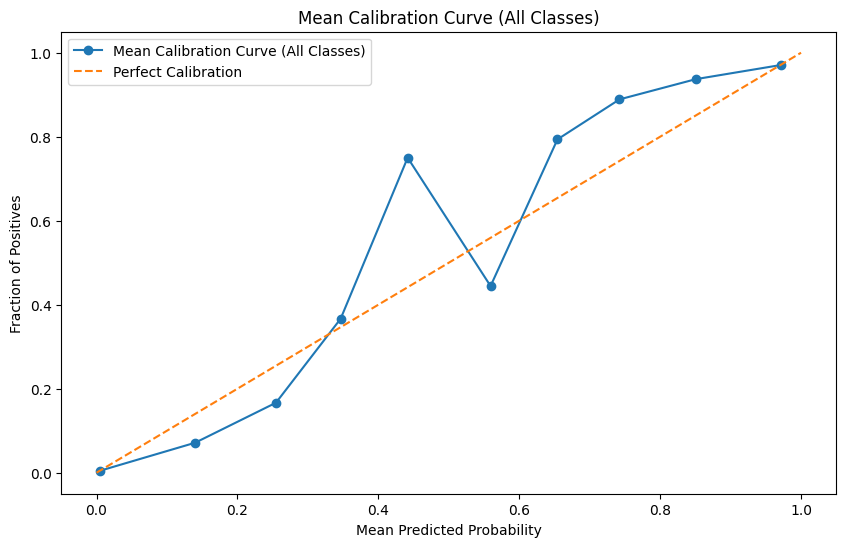

In [249]:
from sklearn.calibration import calibration_curve
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store calibration data for each class
all_true_probs = []
all_mean_pred_probs = []

# Compute calibration curves for each class
for i in range(10):  # Adjust this to match the number of classes
    true_probs, mean_pred_probs = calibration_curve(
        (y_test == i).astype(int),  # Convert y_test to binary for the current class
        probs_bnn[:, i],  # Predicted probabilities for the current class
        n_bins=10,
        pos_label=1  # Explicitly set the positive label to 1
    )
    all_true_probs.append(true_probs)
    all_mean_pred_probs.append(mean_pred_probs)

# Pad shorter arrays with NaNs for averaging
max_len = max(len(tp) for tp in all_true_probs)
all_true_probs = [np.pad(tp, (0, max_len - len(tp)), constant_values=np.nan) for tp in all_true_probs]
all_mean_pred_probs = [np.pad(mpp, (0, max_len - len(mpp)), constant_values=np.nan) for mpp in all_mean_pred_probs]

# Compute mean calibration curve
mean_true_probs = np.nanmean(all_true_probs, axis=0)
mean_pred_probs = np.nanmean(all_mean_pred_probs, axis=0)

# Plot the mean calibration curve
plt.figure(figsize=(10, 6))
plt.plot(mean_pred_probs, mean_true_probs, marker="o", label="Mean Calibration Curve (All Classes)")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect Calibration")
plt.title("Mean Calibration Curve (All Classes)")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.show()
